In [6]:
import pandas as pd
import os
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl
from fiona.io import ZipMemoryFile
import io

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
valid_files = [
    os.path.join("../data/shapefiles", file)
    for file in os.listdir("../data/shapefiles")
    if file.split(".")[-1] == "zip"
]

total_counties_df = []

for county_file in tqdm(sorted(valid_files)):
    county = county_file.split("tl_2020_")[1].split("_")[0]
    # Annoying read using https://gis.stackexchange.com/questions/383465/from-uploaded-zipped-shapefile-to-geopandas-dataframe-in-django-application
    # Just to create a BytesIO object for the demo,
    # similar to your request.FILES['file'].file
    zipshp = io.BytesIO(open(county_file, "rb").read())

    with ZipMemoryFile(zipshp) as memfile:
        with memfile.open() as src:
            crs = src.crs
            county_shape_df = gpd.GeoDataFrame.from_features(src, crs=crs)
    county_shape_df.crs = "epsg:4326"
    total_counties_df.append(county_shape_df)

total_counties_df = pd.concat(total_counties_df)
print(total_counties_df)

100%|████████████████████████████████████████████████████████████| 3221/3221 [18:38<00:00,  2.88it/s]


                                              geometry STATEFP20 COUNTYFP20  \
0    POLYGON ((-86.43344 32.46977, -86.43325 32.469...        01        001   
1    POLYGON ((-86.49678 32.43825, -86.49557 32.439...        01        001   
2    POLYGON ((-86.48140 32.45598, -86.48071 32.455...        01        001   
3    POLYGON ((-86.46499 32.45638, -86.46486 32.457...        01        001   
4    POLYGON ((-86.46751 32.45783, -86.46737 32.459...        01        001   
..                                                 ...       ...        ...   
592  POLYGON ((-66.85314 18.03902, -66.85299 18.039...        72        153   
593  POLYGON ((-66.84973 18.03745, -66.84963 18.037...        72        153   
594  POLYGON ((-66.83711 18.03382, -66.83666 18.034...        72        153   
595  POLYGON ((-66.87492 18.03368, -66.87462 18.033...        72        153   
596  POLYGON ((-66.84237 18.03316, -66.84205 18.033...        72        153   

    TRACTCE20 BLOCKCE20          GEOID20      NAME2

In [9]:
total_counties_df

,geometry,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20
0,"POLYGON ((-86.43344 32.46977, -86.43325 32.469...",01,001,020503,3012,010010205033012,Block 3012,G5040,S,152055,0,+32.4695124,-086.4302842
1,"POLYGON ((-86.49678 32.43825, -86.49557 32.439...",01,001,020600,1009,010010206001009,Block 1009,G5040,S,147523,0,+32.4395167,-086.4931667
2,"POLYGON ((-86.48140 32.45598, -86.48071 32.455...",01,001,020600,3005,010010206003005,Block 3005,G5040,S,30801,0,+32.4546522,-086.4808476
3,"POLYGON ((-86.46499 32.45638, -86.46486 32.457...",01,001,020700,2006,010010207002006,Block 2006,G5040,S,107030,0,+32.4572251,-086.4636602
4,"POLYGON ((-86.46751 32.45783, -86.46737 32.459...",01,001,020700,2008,010010207002008,Block 2008,G5040,S,20638,0,+32.4585243,-086.4667653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,"POLYGON ((-66.85314 18.03902, -66.85299 18.039...",72,153,750400,1005,721537504001005,Block 1005,G5040,S,17704,0,+18.0393134,-066.8517042
593,"POLYGON ((-66.84973 18.03745, -66.84963 18.037...",72,153,750400,4036,721537504004036,Block 4036,G5040,S,1669,0,+18.0372090,-066.8495140
594,"POLYGON ((-66.83711 18.03382, -66.83666 18.034...",72,153,750102,2020,721537501022020,Block 2020,G5040,S,7599,0,+18.0341955,-066.8363111
595,"POLYGON ((-66.87492 18.03368, -66.87462 18.033...",72,153,750501,2011,721537505012011,Block 2011,G5040,S,14169,0,+18.0327329,-066.8744673


In [11]:
coverage_df = pd.read_csv('../data/coverage_report.csv.xz', dtype={'GEOID20': object})
coverage_df

,GEOID20,address_count
0,010010201001000,8
1,010010201001001,10
2,010010201001002,14
3,010010201001003,0
4,010010201001004,0
...,...,...
8174950,721537506022011,0
8174951,721537506022012,0
8174952,721537506022013,0
8174953,721537506022014,0


In [12]:
coverage_df['at_least_one'] = coverage_df['address_count'].apply(lambda x: x > 1)
coverage_df

,GEOID20,address_count,at_least_one
0,010010201001000,8,True
1,010010201001001,10,True
2,010010201001002,14,True
3,010010201001003,0,False
4,010010201001004,0,False
...,...,...,...
8174950,721537506022011,0,False
8174951,721537506022012,0,False
8174952,721537506022013,0,False
8174953,721537506022014,0,False


In [13]:
cdf = total_counties_df.merge(coverage_df, on=['GEOID20'], how='outer')
cdf

,geometry,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,address_count,at_least_one
0,"POLYGON ((-86.43344 32.46977, -86.43325 32.469...",01,001,020503,3012,010010205033012,Block 3012,G5040,S,152055,0,+32.4695124,-086.4302842,46,True
1,"POLYGON ((-86.49678 32.43825, -86.49557 32.439...",01,001,020600,1009,010010206001009,Block 1009,G5040,S,147523,0,+32.4395167,-086.4931667,6,True
2,"POLYGON ((-86.48140 32.45598, -86.48071 32.455...",01,001,020600,3005,010010206003005,Block 3005,G5040,S,30801,0,+32.4546522,-086.4808476,14,True
3,"POLYGON ((-86.46499 32.45638, -86.46486 32.457...",01,001,020700,2006,010010207002006,Block 2006,G5040,S,107030,0,+32.4572251,-086.4636602,34,True
4,"POLYGON ((-86.46751 32.45783, -86.46737 32.459...",01,001,020700,2008,010010207002008,Block 2008,G5040,S,20638,0,+32.4585243,-086.4667653,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8174950,"POLYGON ((-66.85314 18.03902, -66.85299 18.039...",72,153,750400,1005,721537504001005,Block 1005,G5040,S,17704,0,+18.0393134,-066.8517042,0,False
8174951,"POLYGON ((-66.84973 18.03745, -66.84963 18.037...",72,153,750400,4036,721537504004036,Block 4036,G5040,S,1669,0,+18.0372090,-066.8495140,0,False
8174952,"POLYGON ((-66.83711 18.03382, -66.83666 18.034...",72,153,750102,2020,721537501022020,Block 2020,G5040,S,7599,0,+18.0341955,-066.8363111,0,False
8174953,"POLYGON ((-66.87492 18.03368, -66.87462 18.033...",72,153,750501,2011,721537505012011,Block 2011,G5040,S,14169,0,+18.0327329,-066.8744673,0,False


In [14]:
cdf.to_file('../data/us_blocks_address.geojson')

In [21]:
tdf = cdf.sample(int(len(cdf)/100))
tdf

,geometry,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,address_count,at_least_one
3967555,"POLYGON ((-95.46433 40.32892, -95.46433 40.329...",29,005,950200,1156,290059502001156,Block 1156,G5040,S,1835180,0,+40.3342044,-095.4541611,0,False
1323689,"POLYGON ((-81.39681 30.27394, -81.39575 30.274...",12,031,014204,1023,120310142041023,Block 1023,G5040,S,10705,0,+30.2735702,-081.3961812,0,False
3226221,"POLYGON ((-76.56165 38.58085, -76.56098 38.580...",24,009,860501,2015,240098605012015,Block 2015,G5040,S,587195,0,+38.5765546,-076.5566977,27,True
34788,"POLYGON ((-86.23062 32.89063, -86.23052 32.890...",01,037,961200,1012,010379612001012,Block 1012,G5040,S,61955,0,+32.8900315,-086.2294086,0,False
7237690,"POLYGON ((-96.52246 30.99817, -96.52179 30.999...",48,395,960400,1017,483959604001017,Block 1017,G5040,S,92125,0,+31.0054083,-096.5148632,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98691,"POLYGON ((-88.02881 33.85654, -88.02877 33.856...",01,075,030102,1009,010750301021009,Block 1009,G5040,S,3722955,0,+33.8558373,-088.0203900,0,False
7969339,"POLYGON ((-90.11976 44.71082, -90.11737 44.712...",55,073,002102,2039,550730021022039,Block 2039,G5040,S,2481413,0,+44.7064795,-090.1093526,0,False
314204,"POLYGON ((-114.56577 35.17264, -114.56573 35.1...",04,015,951401,1007,040159514011007,Block 1007,G5040,S,1003933,0,+35.1766280,-114.5603431,16,True
4497022,"POLYGON ((-71.69068 42.97814, -71.68972 42.979...",33,011,020000,2021,330110200002021,Block 2021,G5040,S,0,8068,+42.9804819,-071.6891420,0,False


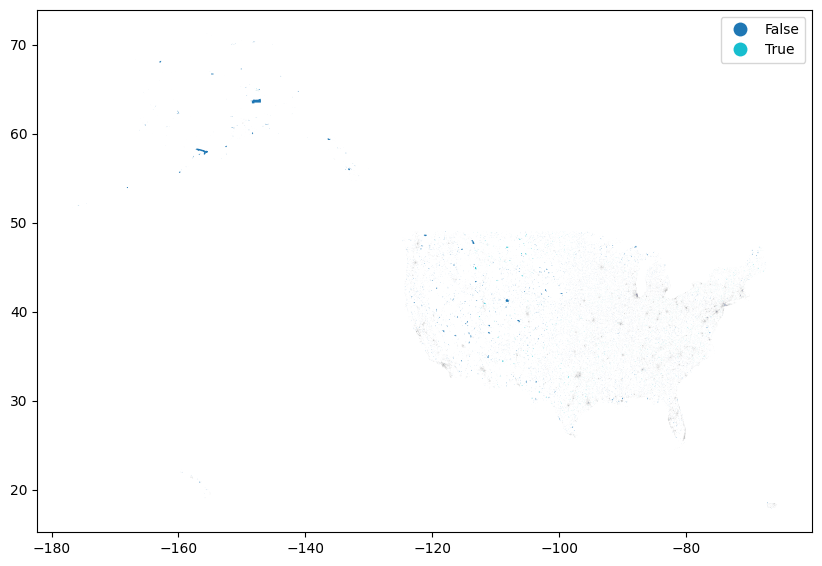

In [26]:
tdf.crs= 4326
ax = tdf.plot(figsize=(10, 10), alpha=1, legend=True, linewidth=0.1, column='at_least_one')
# ctx.add_basemap(ax, zoom=10, crs=cdf.crs.to_string(), source=ctx.providers.Stamen.Toner)